In [1]:
import graphlab
sales = graphlab.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv/')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1513387539.log


This non-commercial license of GraphLab Create for academic use is assigned to stephenmoore56@msn.com and will expire on November 08, 2018.


Finished parsing file /home/stephen/anaconda2/notebooks/Course2/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.051275 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 99 lines. Lines per second: 5098.62

Finished parsing file /home/stephen/anaconda2/notebooks/Course2/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.023571 secs.

In [2]:
sales

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [3]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x="CrimeRate", y="HousePrice")

In [4]:
crime_model = graphlab.linear_regression.create(sales,
                                               target="HousePrice",
                                               features=['CrimeRate'],
                                               validation_set=None,
                                               verbose=False)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

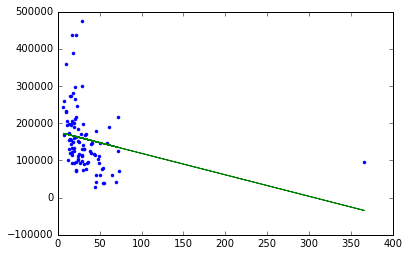

In [13]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',
        sales['CrimeRate'], crime_model.predict(sales),'-');

In [9]:
# note the outlier; high leverage point; Center City (downtown)
# Remove the outlier and re-do the analysis
sales_noCC = sales[sales['MilesPhila'] != 0.0]
sales_noCC.show(view="Scatter Plot", x="CrimeRate", y="HousePrice")

In [10]:
crime_model_noCC = graphlab.linear_regression.create(sales_noCC,
                                               target="HousePrice",
                                               features=['CrimeRate'],
                                               validation_set=None,
                                               verbose=False)

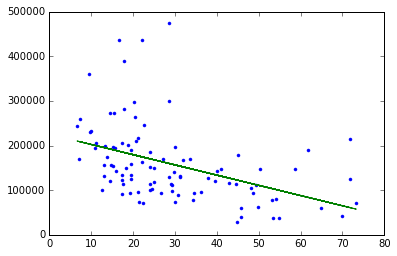

In [12]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',
        sales_noCC['CrimeRate'], crime_model_noCC.predict(sales_noCC),'-');

In [14]:
crime_model.get('coefficients')

name,index,value,stderr
(intercept),None,176626.046881,11245.5882194
CrimeRate,None,-576.804949058,226.90225951


In [15]:
crime_model_noCC.get('coefficients')

name,index,value,stderr
(intercept),None,225204.604303,16404.0247514
CrimeRate,None,-2287.69717443,491.537478123


In [21]:
# remove high y-value observations; they are within the normal x-range, so
# the effect is not as large as removing Center City
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000] 
crime_model_nohighend = graphlab.linear_regression.create(sales_nohighend,
                                                          target='HousePrice',
                                                          features=['CrimeRate'],
                                                          validation_set=None,
                                                          verbose=False)
crime_model_nohighend.get('coefficients')

name,index,value,stderr
(intercept),None,199073.589615,11932.5101105
CrimeRate,None,-1837.71280989,351.519609333


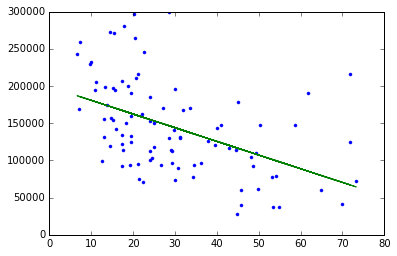

In [20]:
plt.plot(sales_nohighend['CrimeRate'],sales_nohighend['HousePrice'],'.',
        sales_nohighend['CrimeRate'], crime_model_nohighend.predict(sales_nohighend),'-');